<a href="https://colab.research.google.com/github/ScottSnow13/googlecolab/blob/main/qr_code_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#check if gpu is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#split the data set
validation_split = 0.2

qr_dataset_train= tf.keras.utils.image_dataset_from_directory("./qr_codes", labels='inferred', image_size=(200, 200), batch_size=32, validation_split=validation_split, subset="training", seed=123)
qr_dataset_val= tf.keras.utils.image_dataset_from_directory("./qr_codes", labels='inferred', image_size=(200, 200), batch_size=32, validation_split=validation_split, subset="validation", seed=123)

Found 549346 files belonging to 2 classes.
Using 439477 files for training.
Found 549346 files belonging to 2 classes.
Using 109869 files for validation.


In [ ]:
#create, compile, and fit the model with the datasets
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model_history = model.fit(qr_dataset_train, validation_data=qr_dataset_val, epochs=10)


Epoch 1/10


13734/13734 [==============================] - 329s 24ms/step - loss: 0.4484 - accuracy: 0.7918 - val_loss: 0.3777 - val_accuracy: 0.8289
Epoch 2/10
13734/13734 [==============================] - 348s 25ms/step - loss: 0.3278 - accuracy: 0.8555 - val_loss: 0.3471 - val_accuracy: 0.8486
Epoch 3/10
13734/13734 [==============================] - 350s 25ms/step - loss: 0.2541 - accuracy: 0.8923 - val_loss: 0.3662 - val_accuracy: 0.8505
Epoch 4/10
13734/13734 [==============================] - 350s 25ms/step - loss: 0.2014 - accuracy: 0.9177 - val_loss: 0.3963 - val_accuracy: 0.8538
Epoch 5/10
13734/13734 [==============================] - 350s 25ms/step - loss: 0.1642 - accuracy: 0.9341 - val_loss: 0.4962 - val_accuracy: 0.8576
Epoch 6/10
13734/13734 [==============================] - 352s 26ms/step - loss: 0.1365 - accuracy: 0.9462 - val_loss: 0.5138 - val_accuracy: 0.8524
Epoch 7/10
13734/13734 [==============================] - 351s 26ms/step - loss: 0.1162 - accuracy: 0.9551 - val_loss

In [ ]:
#evaluate the models
test_loss, test_accuracy = model.evaluate(qr_dataset_val)
train_loss, train_accuracy = model.evaluate(qr_dataset_train)

print(f"The accuracy of the testing dataset is: {test_accuracy * 100:.2f}%")
print(f"The accuracy of the training dataset is: {train_accuracy * 100:.2f}%")

13734/13734 [==============================] - 172s 13ms/step - loss: 0.1453 - accuracy: 0.9481
The accuracy of the testing dataset is: 85.53%
The accuracy of the training dataset is: 94.81%


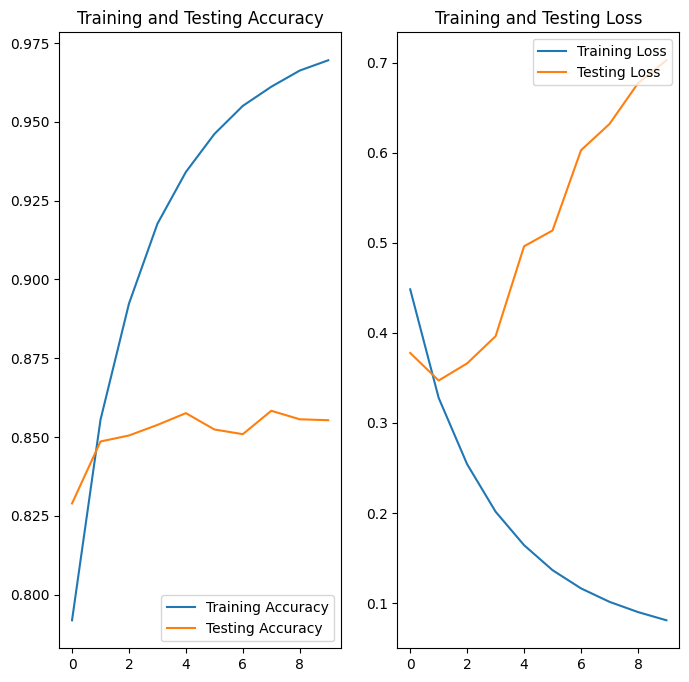

In [ ]:
#plot the accuracy and loss accross the epochs
acc = model_history.history['accuracy']
test_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
test_loss = model_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()